<a href="https://colab.research.google.com/github/haydenbanz/30-Days-Of-Python/blob/master/FACE_SWAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install opencv-python-headless mtcnn opencv-contrib-python-headless dlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 MB 11.1 MB/s eta 0:00:00


In [ ]:
pip install opencv-python-headless mtcnn dlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.6 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install -y libfluidsynth1

# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
import cv2
from mtcnn.mtcnn import MTCNN
import platform
import subprocess

# Function to extract and align face from an image
def extract_and_align_face(image):
    # Use MTCNN for face detection and alignment
    detector = MTCNN()
    faces = detector.detect_faces(image)

    if len(faces) > 0:
        # Get the first detected face (assuming only one face is present)
        x, y, width, height = faces[0]['box']
        x1, y1 = x + width, y + height

        # Extract and return the aligned face
        return image[y:y1, x:x1], x, y, x1, y1

    return None, None, None, None, None

# Load source image (the face to be swapped)
source_image = cv2.imread('1.png')

# Load target image (the image where the face will be swapped into)
target_image = cv2.imread('2.png')

# Extract and align the face from the source image
aligned_face_source, x_source, y_source, x1_source, y1_source = extract_and_align_face(source_image)

# Extract and align the face from the target image
aligned_face_target, x_target, y_target, x1_target, y1_target = extract_and_align_face(target_image)

if aligned_face_source is not None and aligned_face_target is not None:
    # Resize the aligned source face to match the size of the aligned target face
    aligned_face_source = cv2.resize(aligned_face_source, (x1_target - x_target, y1_target - y_target))

    # Replace the face in the target image with the aligned source face
    target_image[y_target:y1_target, x_target:x1_target] = aligned_face_source

    # Save the result image
    cv2.imwrite('result_image.jpg', target_image)

    # Open the saved image using the default image viewer (platform-dependent)
    if platform.system() == 'Darwin':  # macOS
        subprocess.call(['open', 'result_image.jpg'])
    elif platform.system() == 'Windows':
        subprocess.call(['start', 'result_image.jpg'], shell=True)
    else:  # Linux
        subprocess.call(['xdg-open', 'result_image.jpg'])
else:
    print("No face found in either the source or target image.")


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 142ms/step


**FACESWAP **

In [5]:
pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=9228e6f9ee5dca5c2605ed90adc186515fdf5623307b67b9b869f912cea035fa
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


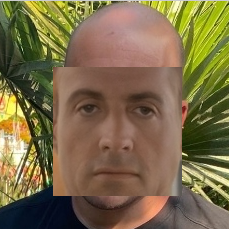

In [11]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow

# Function to extract and align face from an image using face_recognition
def extract_and_align_face(image):
    # Find all face locations in the image
    face_locations = face_recognition.face_locations(image)

    if len(face_locations) > 0:
        # Assuming only one face is present, use the first face found
        top, right, bottom, left = face_locations[0]
        face_image = image[top:bottom, left:right]

        return face_image, top, left, bottom, right  # Return the aligned face and coordinates
    else:
        return None, None, None, None, None  # Return None if no face is found

# Load source image (the face to be swapped)
source_image = cv2.imread('1.png')

# Load target image (the image where the face will be swapped into)
target_image = cv2.imread('2.png')

# Extract and align the face from the source image
aligned_face_source, top_source, left_source, bottom_source, right_source = extract_and_align_face(source_image)

# Extract and align the face from the target image
aligned_face_target, top_target, left_target, bottom_target, right_target = extract_and_align_face(target_image)

if aligned_face_source is not None and aligned_face_target is not None:
    # Replace the face in the target image with the aligned source face
    target_image[top_target:bottom_target, left_target:right_target] = aligned_face_source

    # Save the result image
    cv2.imwrite('result_image.jpg', target_image)

    # Display the result image
    cv2_imshow(target_image)
else:
    print("No face found in either the source or target image.")


**FACE SWAP LVL** **3**

In [28]:
pip install face_swap

ERROR: Could not find a version that satisfies the requirement face_swap (from versions: none)
ERROR: No matching distribution found for face_swap


In [37]:
!pip install torch torchvision torchaudio


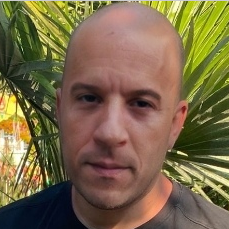

True

In [39]:
import cv2
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow

# Load source image (the face to be swapped)
source_image = face_recognition.load_image_file("1.png")
source_face_encodings = face_recognition.face_encodings(source_image)

if not source_face_encodings:
    print("No face found in the source image.")
else:
    source_face_encoding = source_face_encodings[0]

# Load target image (the image where the face will be swapped into)
target_image = cv2.imread("2.png")

# Detect faces in the target image
face_locations = face_recognition.face_locations(target_image)
face_encodings = face_recognition.face_encodings(target_image, face_locations)

for face_location, face_encoding in zip(face_locations, face_encodings):
    # Calculate the face distance between the source and target faces
    face_distance = face_recognition.face_distance([source_face_encoding], face_encoding)[0]

    # Define a threshold for face swapping (you can adjust this threshold)
    if face_distance < 0.6:
        # Extract the face region to be swapped
        top, right, bottom, left = face_location
        face_to_swap = target_image[top:bottom, left:right]

        # Resize the source face to match the size of the target face
        source_face = cv2.resize(source_image, (right - left, bottom - top))

        # Perform face swapping by replacing the face in the target image
        target_image[top:bottom, left:right] = source_face

# Display and save the result image
cv2_imshow(target_image)
cv2.imwrite("result_image.jpg", target_image)


In [32]:
!pip install opencv-python-headless


In [33]:
!pip install Pillow


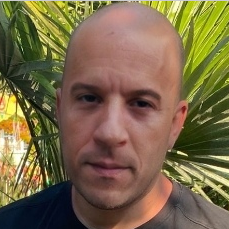

True

In [29]:
import cv2
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow

# Load source image (the face to be swapped)
source_image = face_recognition.load_image_file("1.png")
source_face_encodings = face_recognition.face_encodings(source_image)

if not source_face_encodings:
    print("No face found in the source image.")
else:
    source_face_encoding = source_face_encodings[0]

# Load target image (the image where the face will be swapped into)
target_image = cv2.imread("2.png")

# Detect faces in the target image
face_locations = face_recognition.face_locations(target_image)
face_encodings = face_recognition.face_encodings(target_image, face_locations)

for face_location, face_encoding in zip(face_locations, face_encodings):
    # Calculate the face distance between the source and target faces
    face_distance = face_recognition.face_distance([source_face_encoding], face_encoding)[0]

    # Define a threshold for face swapping (you can adjust this threshold)
    if face_distance < 0.6:
        # Extract the face region to be swapped
        top, right, bottom, left = face_location
        face_to_swap = target_image[top:bottom, left:right]

        # Resize the source face to match the size of the target face
        source_face = cv2.resize(source_image, (right - left, bottom - top))

        # Perform face swapping by replacing the face in the target image
        target_image[top:bottom, left:right] = source_face

# Display and save the result image
cv2_imshow(target_image)
cv2.imwrite("result_image.jpg", target_image)
